In [3]:
# 修改pandas默认的现实设置
import pandas as pd
pd.set_option('display.max_columns',10)  
pd.set_option('display.max_rows',20)  

## 导入工具包

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings

warnings.filterwarnings("ignore")
%matplotlib inline

## 读取数据文件

In [4]:
train_data_file = "./zhengqi_train.txt"
test_data_file = "./zhengqi_test.txt"

train_data = pd.read_csv(train_data_file, sep='\t', encoding='utf-8')
test_data = pd.read_csv(test_data_file, sep='\t', encoding='utf-8')

## 查看训练集数据信息

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2888 entries, 0 to 2887
Data columns (total 39 columns):
V0        2888 non-null float64
V1        2888 non-null float64
V2        2888 non-null float64
V3        2888 non-null float64
V4        2888 non-null float64
V5        2888 non-null float64
V6        2888 non-null float64
V7        2888 non-null float64
V8        2888 non-null float64
V9        2888 non-null float64
V10       2888 non-null float64
V11       2888 non-null float64
V12       2888 non-null float64
V13       2888 non-null float64
V14       2888 non-null float64
V15       2888 non-null float64
V16       2888 non-null float64
V17       2888 non-null float64
V18       2888 non-null float64
V19       2888 non-null float64
V20       2888 non-null float64
V21       2888 non-null float64
V22       2888 non-null float64
V23       2888 non-null float64
V24       2888 non-null float64
V25       2888 non-null float64
V26       2888 non-null float64
V27       2888 non-null float

In [ ]:
结论：
- 共有V0~V37的38个特征和一个目标列Target，2888条数据
- 各个特征V0~V37没有具体的名字，只有标号
- 所有特征没有缺失值，且均为浮点64位

## 查看测试集数据基本信息

In [9]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1925 entries, 0 to 1924
Data columns (total 38 columns):
V0     1925 non-null float64
V1     1925 non-null float64
V2     1925 non-null float64
V3     1925 non-null float64
V4     1925 non-null float64
V5     1925 non-null float64
V6     1925 non-null float64
V7     1925 non-null float64
V8     1925 non-null float64
V9     1925 non-null float64
V10    1925 non-null float64
V11    1925 non-null float64
V12    1925 non-null float64
V13    1925 non-null float64
V14    1925 non-null float64
V15    1925 non-null float64
V16    1925 non-null float64
V17    1925 non-null float64
V18    1925 non-null float64
V19    1925 non-null float64
V20    1925 non-null float64
V21    1925 non-null float64
V22    1925 non-null float64
V23    1925 non-null float64
V24    1925 non-null float64
V25    1925 non-null float64
V26    1925 non-null float64
V27    1925 non-null float64
V28    1925 non-null float64
V29    1925 non-null float64
V30    1925 non-null fl

结论：
- 测试集共有1925条数据
- 所有特征无缺失值
- 没有目标列target

In [11]:
pd.set_option('display.max_columns',6)  

## 训练集统计信息

In [12]:
train_data.describe()

,V0,V1,V2,...,V36,V37,target
count,2888.000000,2888.000000,2888.000000,...,2888.000000,2888.000000,2888.000000
mean,0.123048,0.056068,0.289720,...,0.030658,-0.130330,0.126353
std,0.928031,0.941515,0.911236,...,0.970812,1.017196,0.983966
min,-4.335000,-5.122000,-3.420000,...,-2.608000,-3.630000,-3.044000
25%,-0.297000,-0.226250,-0.313000,...,-0.413000,-0.798250,-0.350250
50%,0.359000,0.272500,0.386000,...,0.137000,-0.185500,0.313000
75%,0.726000,0.599000,0.918250,...,0.644250,0.495250,0.793250
max,2.121000,1.918000,2.828000,...,5.238000,3.000000,2.538000


## 测试集统计信息

In [13]:
test_data.describe()

,V0,V1,V2,...,V35,V36,V37
count,1925.000000,1925.000000,1925.000000,...,1925.000000,1925.000000,1925.000000
mean,-0.184404,-0.083912,-0.434762,...,-0.296895,-0.046270,0.195735
std,1.073333,1.076670,0.969541,...,0.946896,1.040854,0.940599
min,-4.814000,-5.488000,-4.283000,...,-7.477000,-2.608000,-3.346000
25%,-0.664000,-0.451000,-0.978000,...,-0.349000,-0.593000,-0.432000
50%,0.065000,0.195000,-0.267000,...,-0.270000,0.083000,0.152000
75%,0.549000,0.589000,0.278000,...,0.364000,0.651000,0.797000
max,2.100000,2.120000,1.946000,...,1.671000,2.861000,3.021000


## 查看训练集数据字段信息

In [15]:
pd.set_option('display.max_columns',10)  

In [16]:
train_data.head()

,V0,V1,V2,V3,V4,...,V34,V35,V36,V37,target
0,0.566,0.016,-0.143,0.407,0.452,...,-4.789,-5.101,-2.608,-3.508,0.175
1,0.968,0.437,0.066,0.566,0.194,...,0.160,0.364,-0.335,-0.730,0.676
2,1.013,0.568,0.235,0.370,0.112,...,0.160,0.364,0.765,-0.589,0.633
3,0.733,0.368,0.283,0.165,0.599,...,-0.065,0.364,0.333,-0.112,0.206
4,0.684,0.638,0.260,0.209,0.337,...,-0.215,0.364,-0.280,-0.028,0.384


##  查看测试集数据字段信息

In [17]:
test_data.head()

,V0,V1,V2,V3,V4,...,V33,V34,V35,V36,V37
0,0.368,0.380,-0.225,-0.049,0.379,...,0.534,-0.009,-0.190,-0.567,0.388
1,0.148,0.489,-0.247,-0.049,0.122,...,0.046,-0.220,0.008,-0.294,0.104
2,-0.166,-0.062,-0.311,0.046,-0.055,...,0.017,-0.234,0.008,0.373,0.569
3,0.102,0.294,-0.259,0.051,-0.183,...,-0.040,-0.290,0.008,-0.666,0.391
4,0.300,0.428,0.208,0.051,-0.033,...,-0.040,-0.290,0.008,-0.140,-0.497


## 异常值检测：绘制特征V0的箱型图

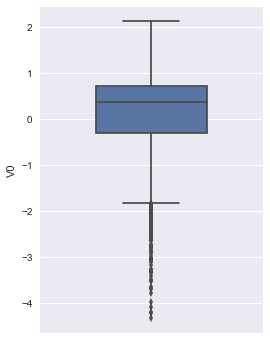

In [8]:
fig = plt.figure(figsize=(4, 6))  # 指定绘图对象宽度和高度
sns.boxplot(train_data['V0'],orient="v", width=0.5) #orient="v"表示竖直显示

结论：偏离下界的异常点比较多

## 绘制所有特征的箱型图

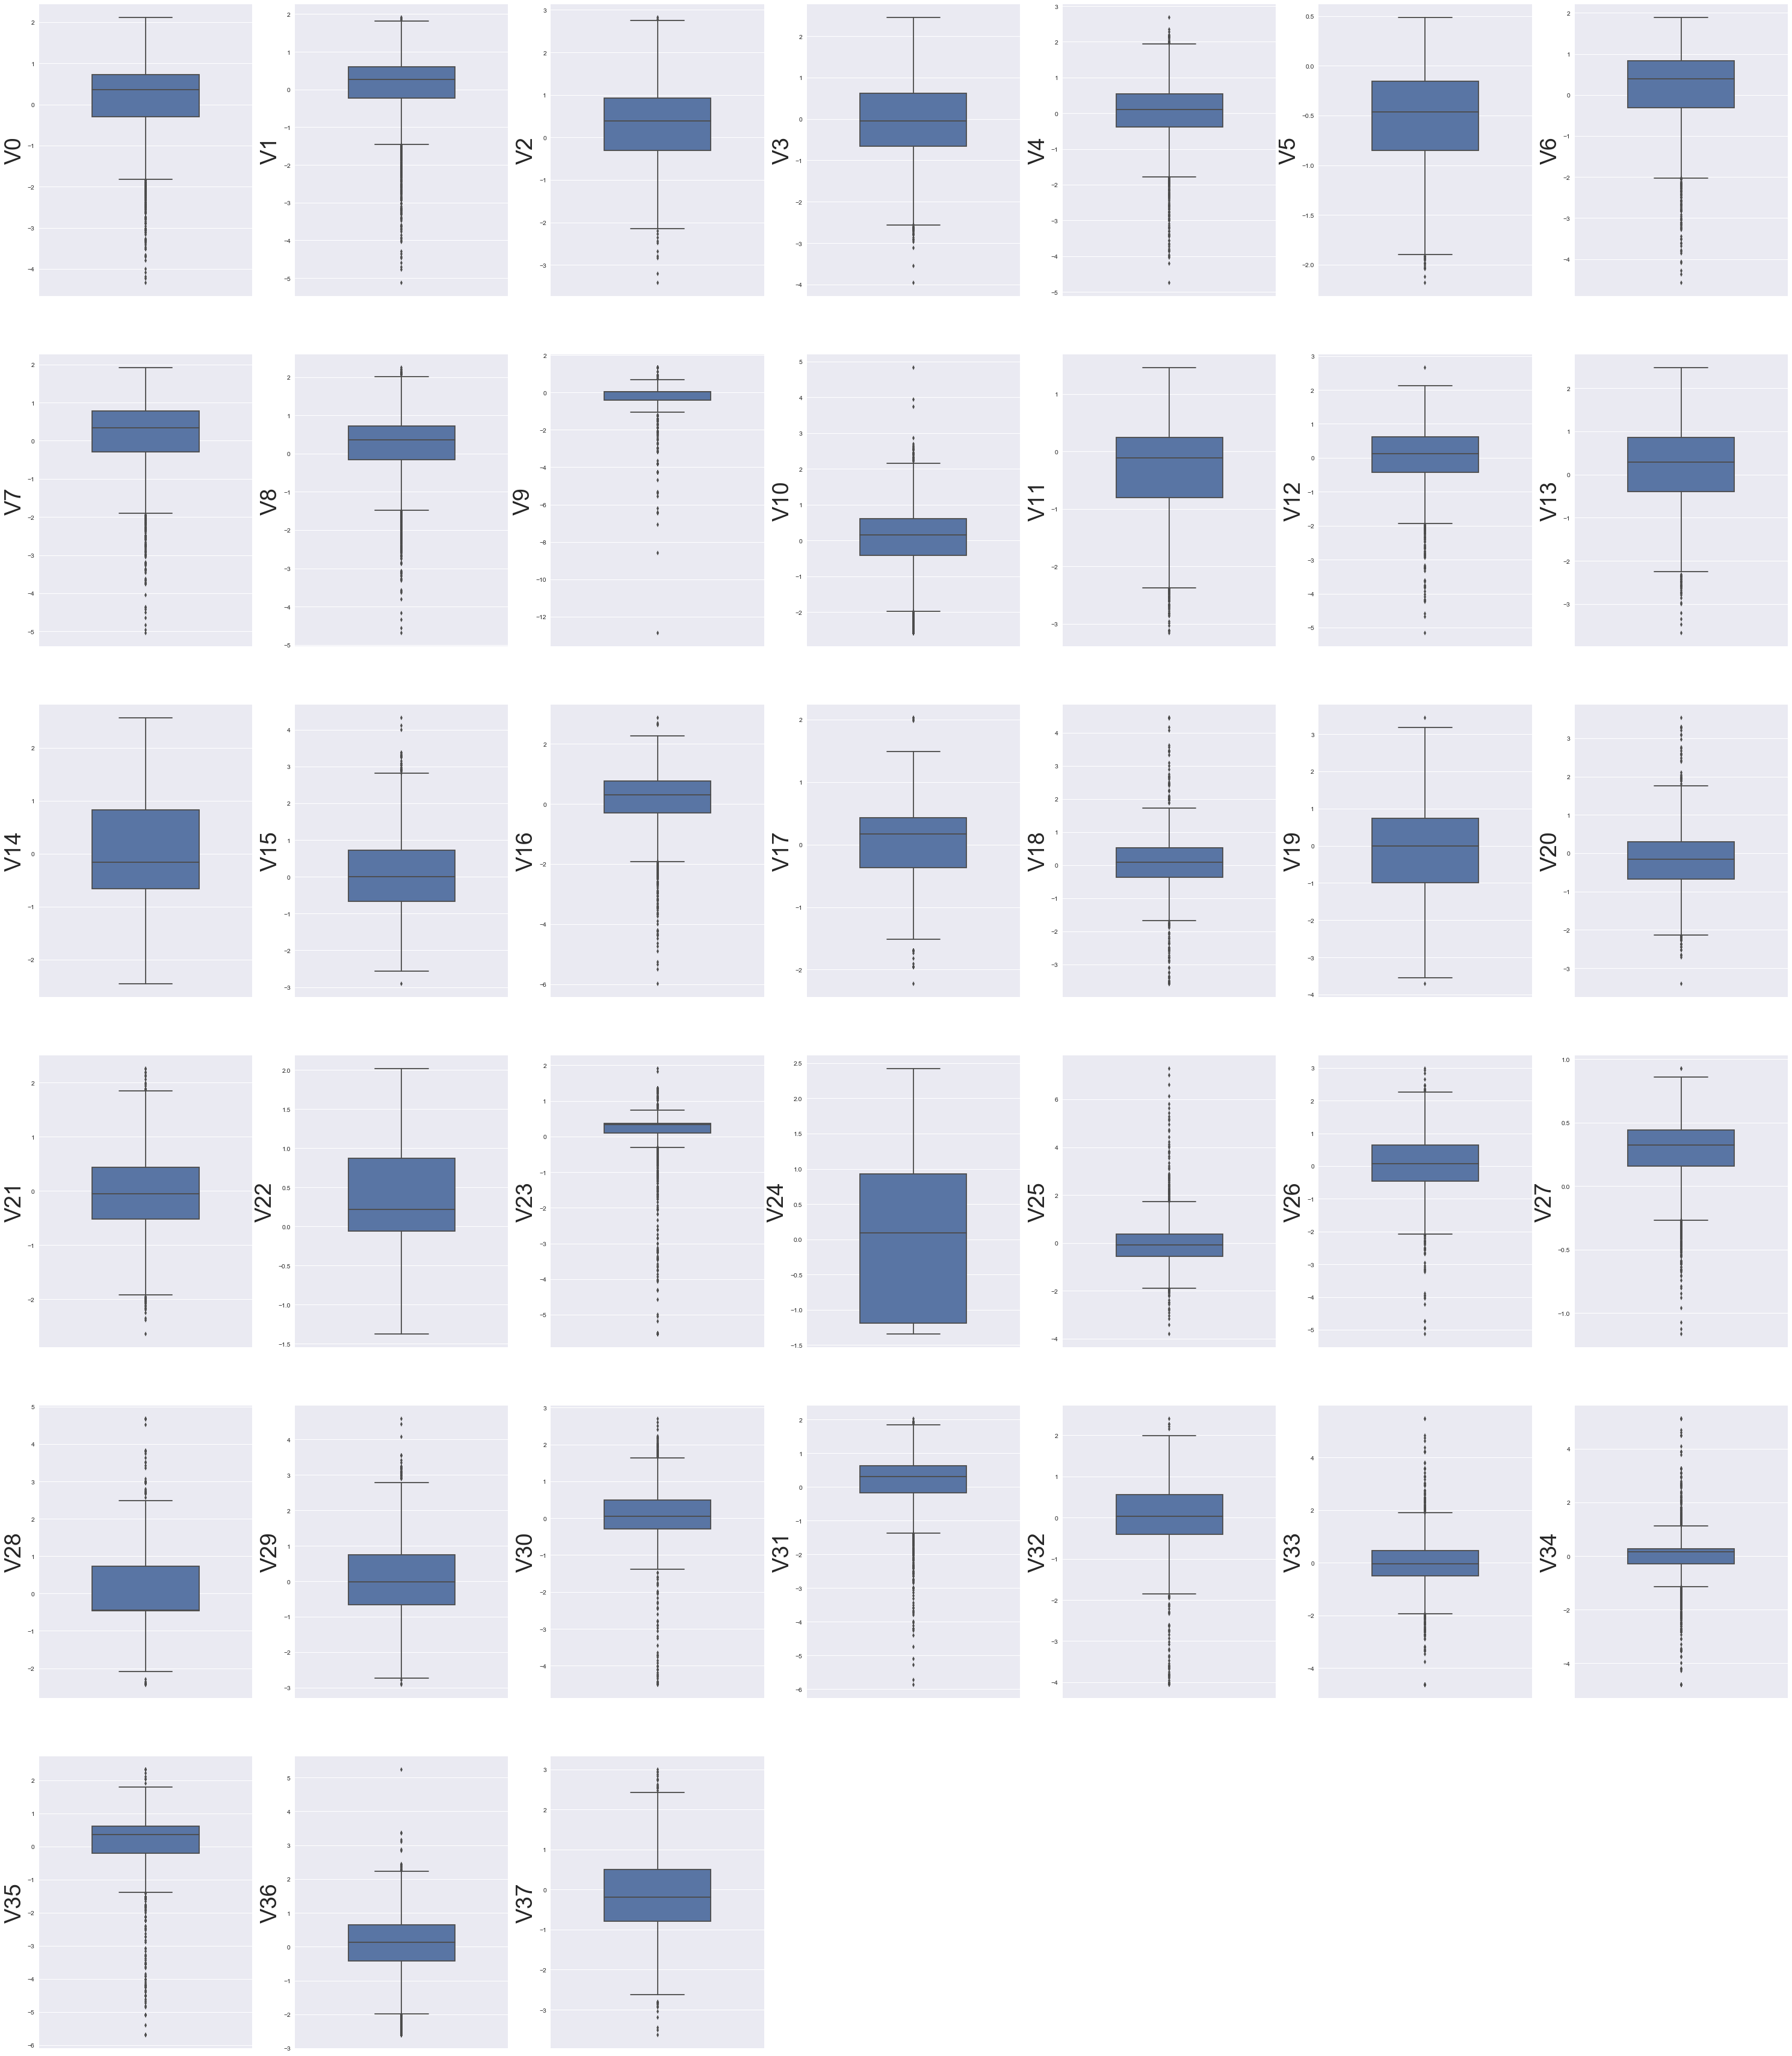

In [34]:
column = train_data.columns.tolist()[:39]  # 列表头
fig = plt.figure(figsize=(50, 60), dpi=75)  # 指定绘图对象宽度和高度
for i in range(38):
    plt.subplot(6, 7, i + 1)  # 6行7列子图
    sns.boxplot(train_data[column[i]], orient="v", width=0.5)  # 箱式图
    plt.ylabel(column[i], fontsize=36)
plt.show()

In [ ]:
结论：发现较多特征存在异常值情况
因此，下面定义一个获取异常点的函数

## 定义一个基于线性回归的异常点获取函数

In [11]:
def find_outliers(model, X, y, sigma=3):

    # 使用模型预测y值
    try:
        y_pred = pd.Series(model.predict(X), index=y.index)
    # 如果预测失败，则先训练模型
    except:
        model.fit(X,y)
        y_pred = pd.Series(model.predict(X), index=y.index)
        
    # 计算预测值和真实值之间的残差，以及残差的均值、标准差
    resid = y - y_pred
    mean_resid = resid.mean()
    std_resid = resid.std()

    # 计算Z统计量，我们【把异常点定义为Z的绝对值大于sigma的点】
    z = (resid - mean_resid)/std_resid    
    outliers = z[abs(z)>sigma].index
    
    # 打印以及绘图
    print('R2=',model.score(X,y))
    print("mse=",mean_squared_error(y,y_pred))
    print('---------------------------------------')

    print('mean of residuals:',mean_resid)
    print('std of residuals:',std_resid)
    print('---------------------------------------')

    print(len(outliers),'outliers:')
    print(outliers.tolist())

    plt.figure(figsize=(15,5))
    ax_131 = plt.subplot(1,3,1)
    plt.plot(y,y_pred,'.') #非异常点用蓝色小点表示
    plt.plot(y.loc[outliers],y_pred.loc[outliers],'ro') #异常点用红色大点表示
    plt.legend(['Accepted','Outlier'])
    plt.xlabel('y')
    plt.ylabel('y_pred');

    ax_132=plt.subplot(1,3,2)
    plt.plot(y,y-y_pred,'.')
    plt.plot(y.loc[outliers],y.loc[outliers]-y_pred.loc[outliers],'ro')
    plt.legend(['Accepted','Outlier'])
    plt.xlabel('y')
    plt.ylabel('y - y_pred');

    ax_133=plt.subplot(1,3,3)
    z.plot.hist(bins=50,ax=ax_133)
    z.loc[outliers].plot.hist(color='r',bins=50,ax=ax_133) #将异常点对应部分标红
    plt.legend(['Accepted','Outlier'])
    plt.xlabel('z')
    
    plt.savefig('outliers.png')
    
    return outliers

## 绘制异常值分布

R2= 0.889109346248
mse= 0.107325879224
---------------------------------------
mean of residuals: -1.8990657000167152e-17
std of residuals: 0.32766302018532545
---------------------------------------
31 outliers:
[321, 348, 376, 777, 884, 1145, 1164, 1310, 1458, 1466, 1484, 1523, 1704, 1874, 1879, 1979, 2002, 2279, 2528, 2620, 2645, 2647, 2667, 2668, 2669, 2696, 2767, 2769, 2807, 2842, 2863]


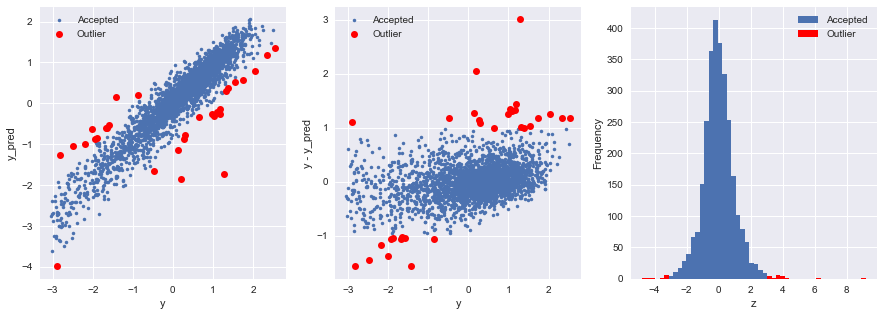

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
X_train=train_data.iloc[:,0:-1]
y_train=train_data.iloc[:,-1]
outliers = find_outliers(LinearRegression(), X_train, y_train)

结论：通过基于线性回归的异常点检测，共有31个异常点，标号为：
[321, 348, 376, 777, 884, 1145, 1164, 1310, 1458, 1466, 1484, 1523, 1704, 1874, 1879, 1979, 2002, 2279, 2528, 2620, 2645, 2647, 2667, 2668, 2669, 2696, 2767, 2769, 2807, 2842, 2863]

## 查看特征是否符合正态分布：
## sns.distplot函数（直方图和核密度估计图）和stats.probplot函数（Q-Q图，Quantile-Quantile图）
### 如果特征不是正态分布，后续要用采用特征变换对其处理
### 首先查看V0的情况
q-q 图是通过比较数据和正态分布的分位数是否相等来判断数据是否符合正态分布
红色线条表示正态分布，蓝色线条表示样本数据，蓝色越接近红色参考线，说明越符合预期分布（默认为正态分布）

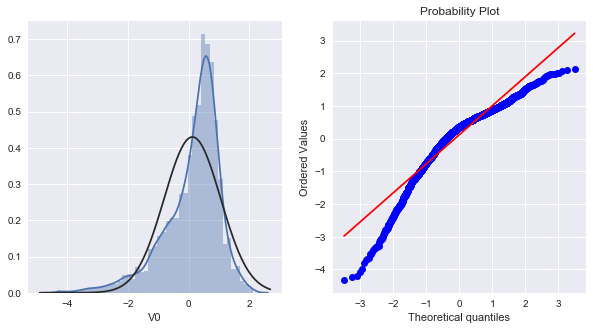

In [18]:
plt.figure(figsize=(10,5))

ax=plt.subplot(1,2,1)
sns.distplot(train_data['V0'],fit=stats.norm)
ax=plt.subplot(1,2,2)
res = stats.probplot(train_data['V0'], plot=plt)

In [ ]:
结论：显然,V0不符合正态分布

## 所有变量的直方图和Q-Q图

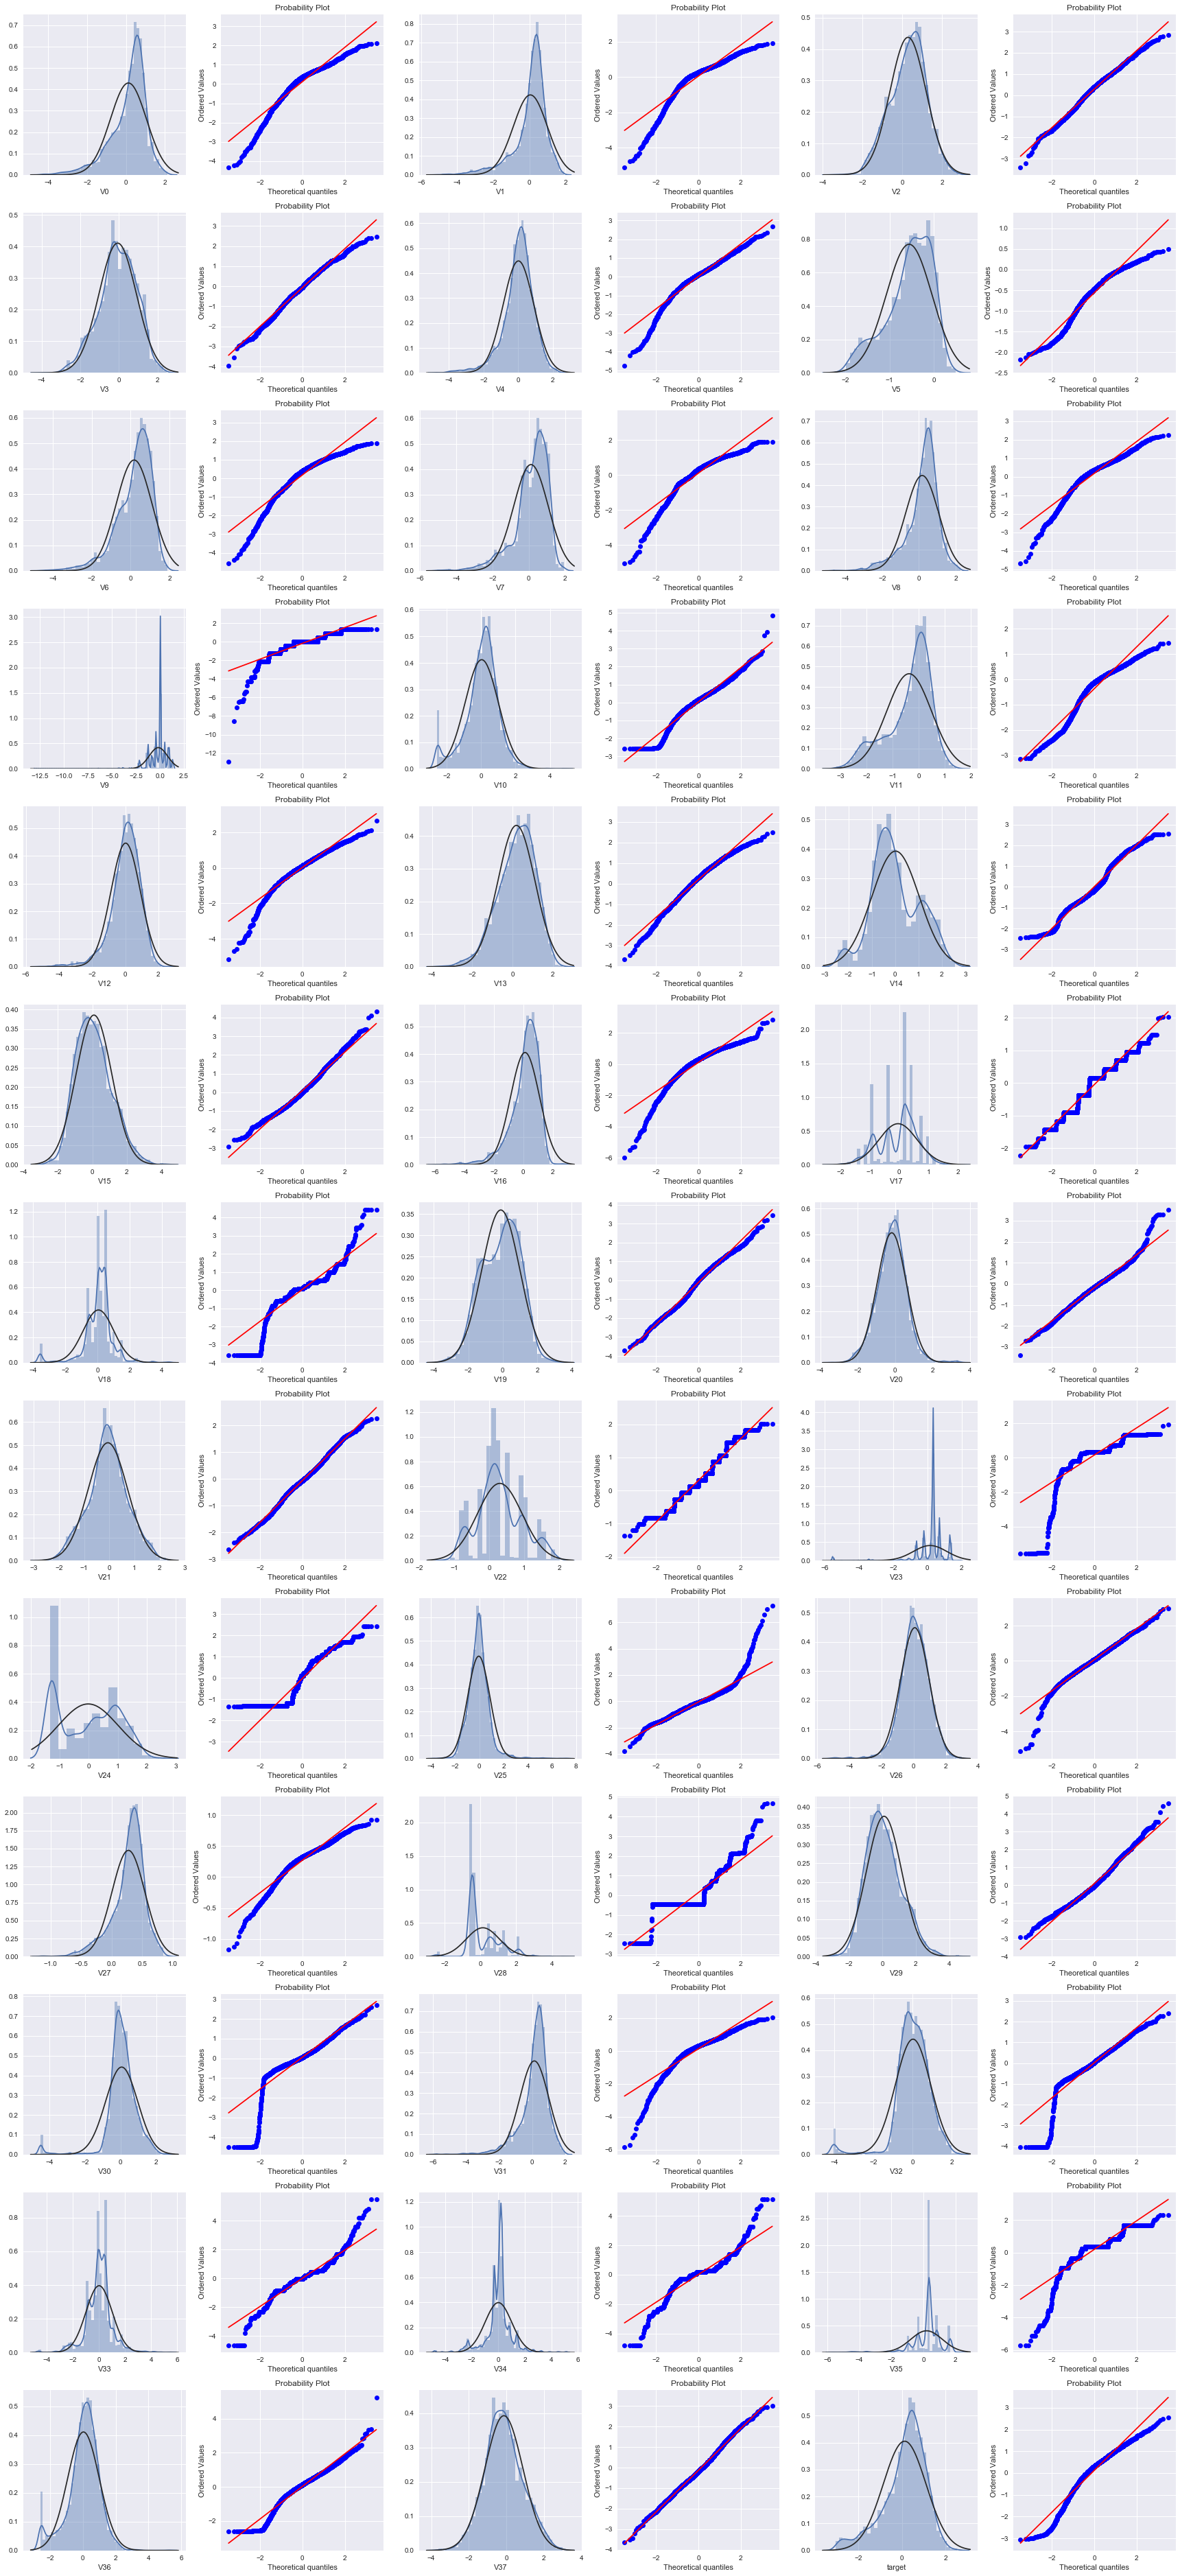

In [33]:
train_cols = 6
train_rows = len(train_data.columns)
plt.figure(figsize=(4*train_cols,4*train_rows),)

i=0
for col in train_data.columns:
    i+=1
    ax=plt.subplot(train_rows,train_cols,i)
    sns.distplot(train_data[col],fit=stats.norm)
    
    i+=1
    ax=plt.subplot(train_rows,train_cols,i)
    res = stats.probplot(train_data[col], plot=plt)
plt.tight_layout()
plt.show()

## 查看训练集和测试集中特征分布是否一致
## 对于不一致的特征，会影响模型的泛化能力，需要直接删除

## V0的KDE分布图

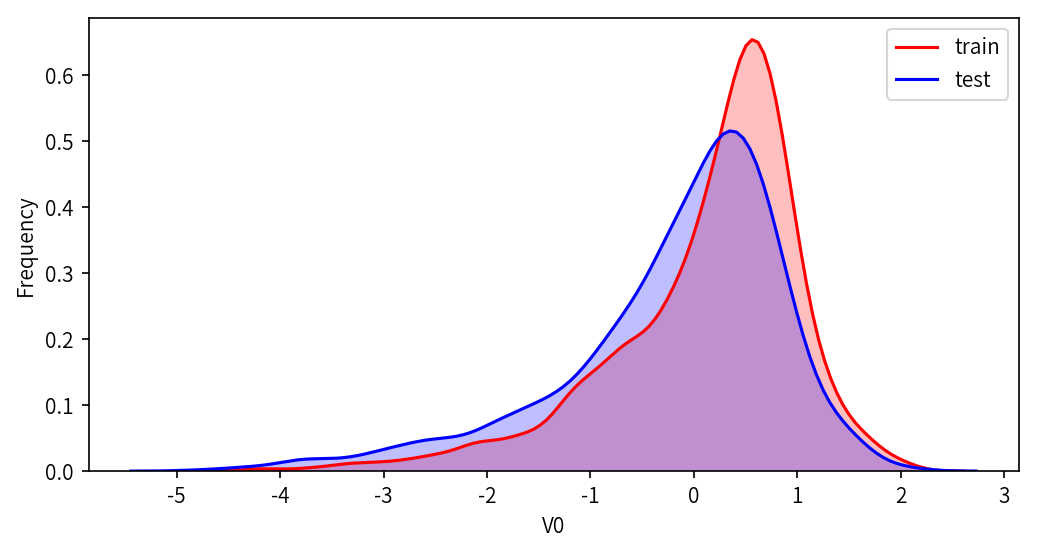

In [25]:
plt.figure(figsize=(8,4),dpi=150)
ax = sns.kdeplot(train_data['V0'], color="Red", shade=True)
ax = sns.kdeplot(test_data['V0'], color="Blue", shade=True)
ax.set_xlabel('V0')
ax.set_ylabel("Frequency")
ax = ax.legend(["train","test"])

结论：V0在2个数据集的分布基本一致。

## 全部变量的KDE分布图

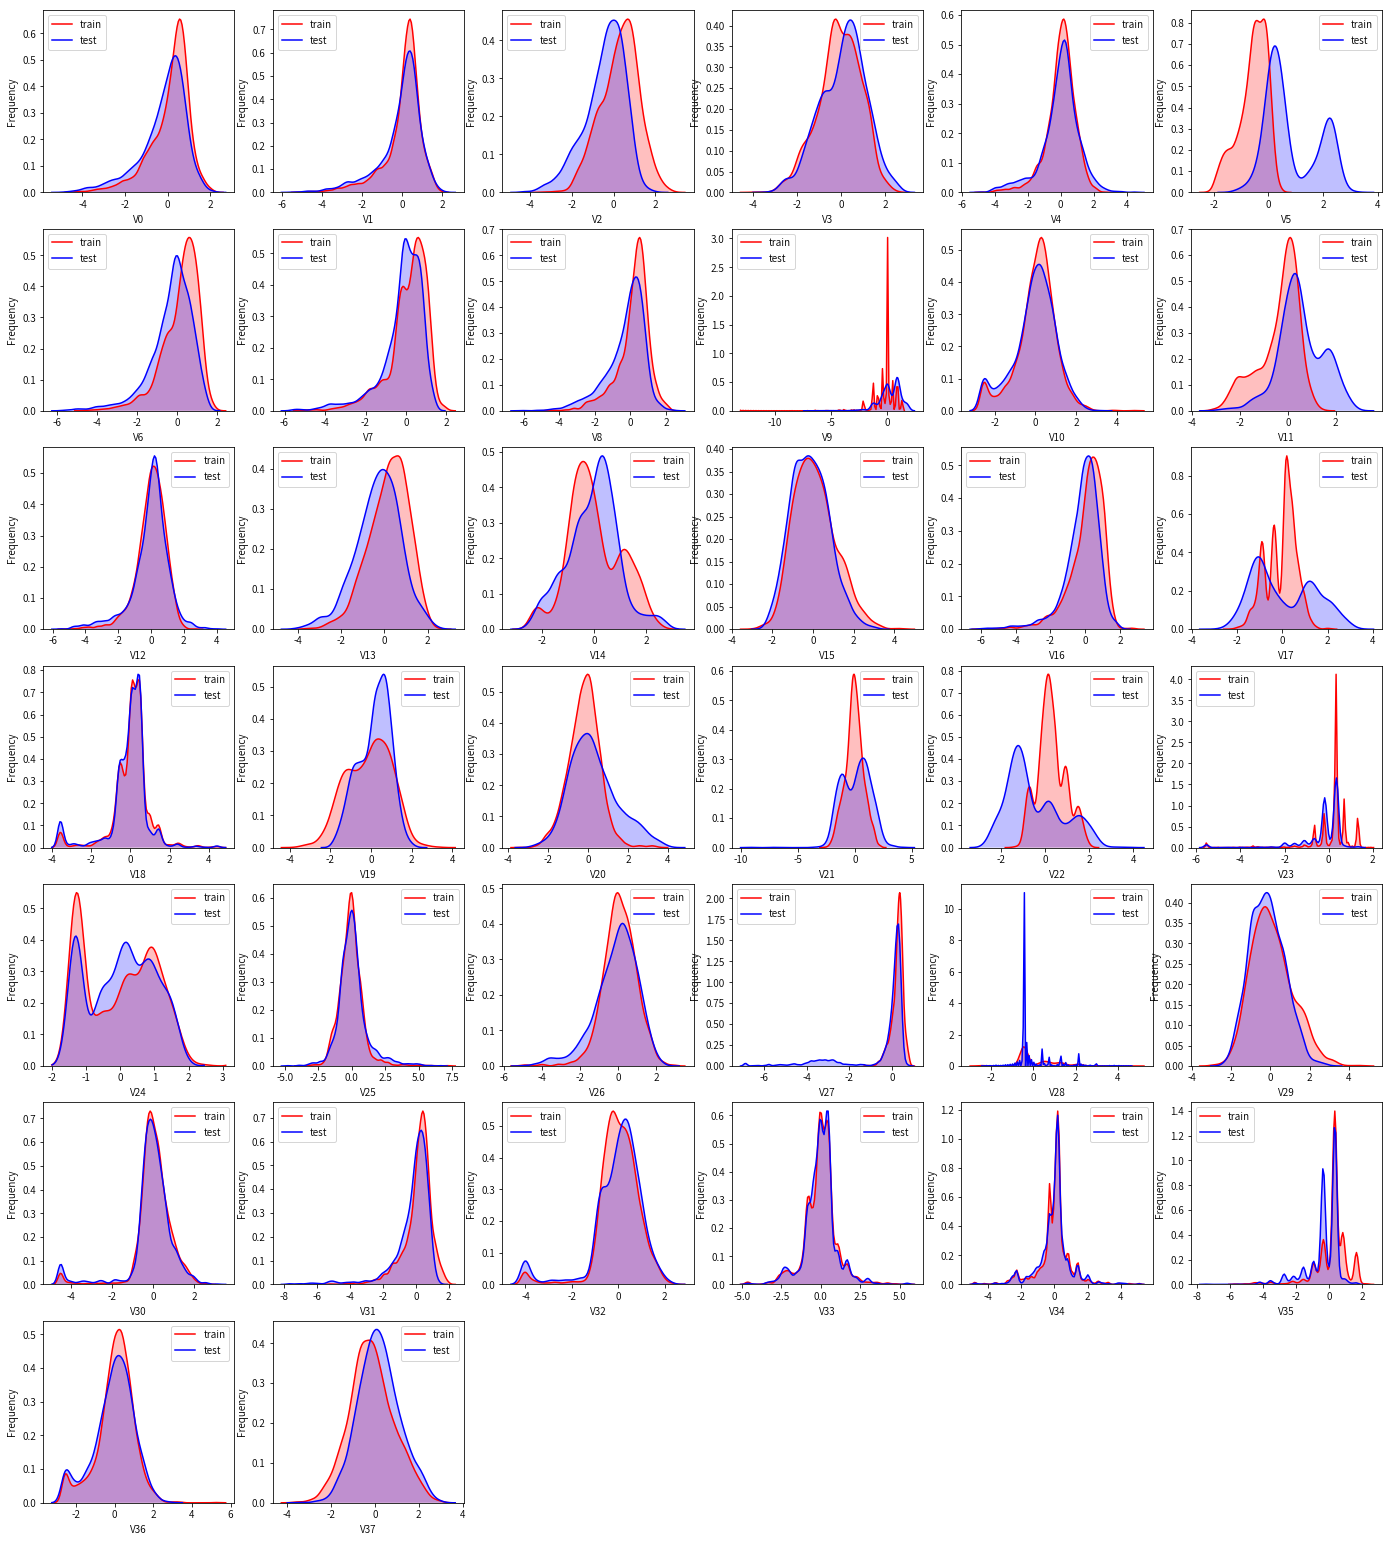

In [26]:
dist_cols = 6
dist_rows = len(test_data.columns)
plt.figure(figsize=(4 * dist_cols, 4 * dist_rows))

i = 1
for col in test_data.columns:
    ax = plt.subplot(dist_rows, dist_cols, i)
    ax = sns.kdeplot(train_data[col], color="Red", shade=True)
    ax = sns.kdeplot(test_data[col], color="Blue", shade=True)
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")
    ax = ax.legend(["train", "test"])

    i += 1
plt.show()

In [ ]:
结论：变量V5、V9、V11、V17、V22、V28在训练集和测试集中分布不一致，后续处理中直接删除。

## 特征变量相关系数：corr（）函数

In [35]:
pd.set_option('display.max_columns',5)  

In [36]:
pd.set_option('display.max_columns', 10)
pd.set_option('display.max_rows', 10)
data_train1 = train_data.drop(['V5', 'V9', 'V11', 'V17', 'V22', 'V28'], axis=1)
train_corr = data_train1.corr()
train_corr

,V0,V1,V2,V3,V4,...,V34,V35,V36,V37,target
V0,1.000000,0.908607,0.463643,0.409576,0.781212,...,-0.019342,0.138933,0.231417,-0.494076,0.873212
V1,0.908607,1.000000,0.506514,0.383924,0.657790,...,-0.029115,0.146329,0.235299,-0.494043,0.871846
V2,0.463643,0.506514,1.000000,0.410148,0.057697,...,-0.025620,0.043648,0.316462,-0.734956,0.638878
V3,0.409576,0.383924,0.410148,1.000000,0.315046,...,-0.031898,0.080034,0.324475,-0.229613,0.512074
V4,0.781212,0.657790,0.057697,0.315046,1.000000,...,0.028659,0.100010,0.113609,-0.031054,0.603984
...,...,...,...,...,...,...,...,...,...,...,...
V34,-0.019342,-0.029115,-0.025620,-0.031898,0.028659,...,1.000000,0.233616,-0.019032,-0.006854,-0.006034
V35,0.138933,0.146329,0.043648,0.080034,0.100010,...,0.233616,1.000000,0.025401,-0.077991,0.140294
V36,0.231417,0.235299,0.316462,0.324475,0.113609,...,-0.019032,0.025401,1.000000,-0.039478,0.319309
V37,-0.494076,-0.494043,-0.734956,-0.229613,-0.031054,...,-0.006854,-0.077991,-0.039478,1.000000,-0.565795


## 相关系数热力图

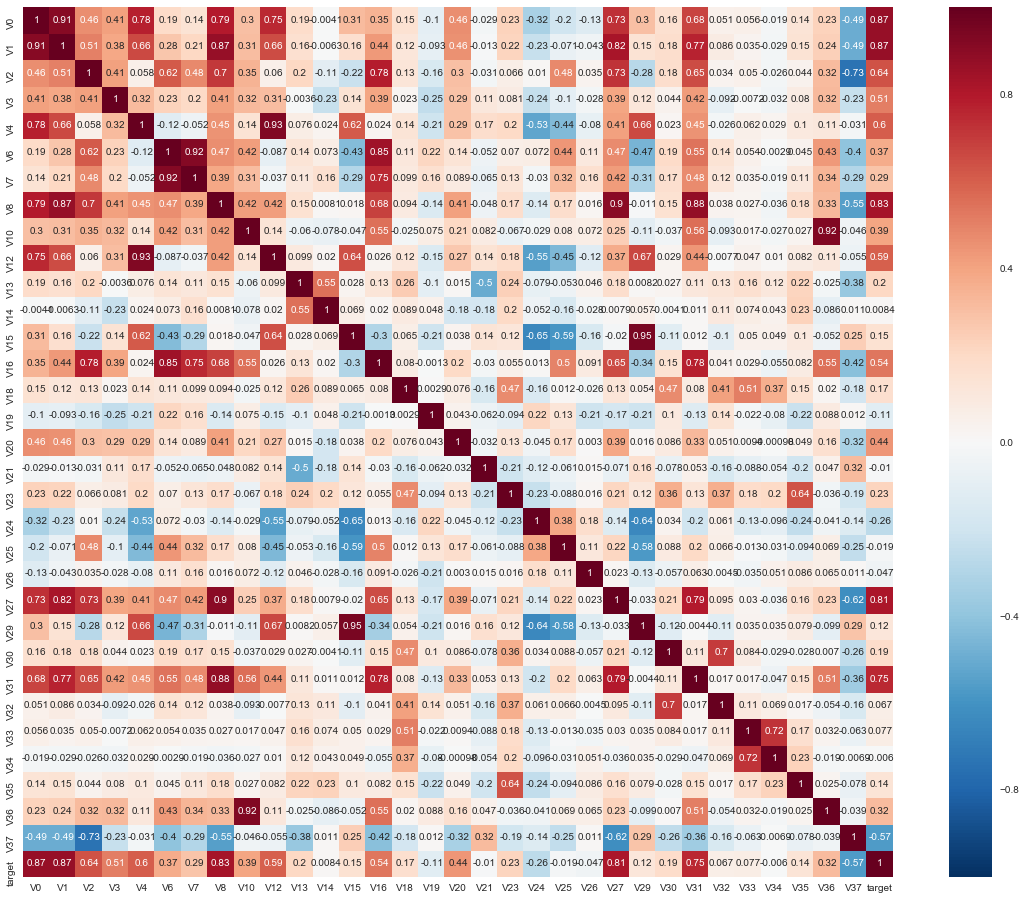

In [42]:
ax = plt.subplots(figsize=(20, 16))#调整画布大小
ax = sns.heatmap(train_corr, vmax=1, square=True, annot=True)#画热力图   annot=True 显示系数

## K个最相关的特征

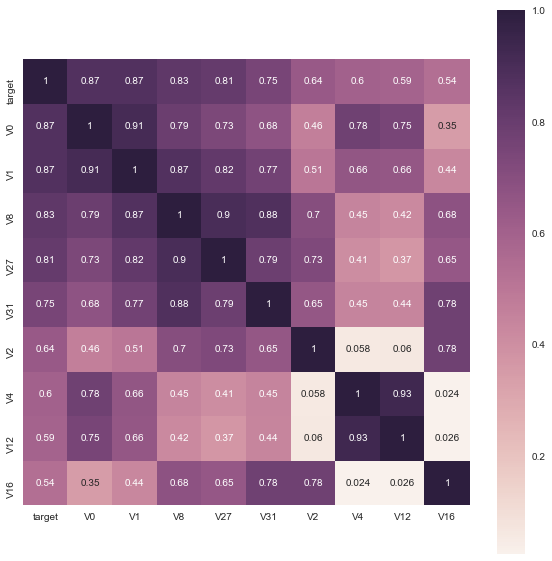

In [41]:
k = 10  # 热力图中的变量个数
cols = train_corr.nlargest(k, 'target')['target'].index

#cm = np.corrcoef(train_data[cols].values.T)
hm = plt.subplots(figsize=(10, 10))  #调整画布大小
hm = sns.heatmap(train_data[cols].corr(), annot=True, square=True)
plt.show()

## 相关系数大于0.5的特征变量

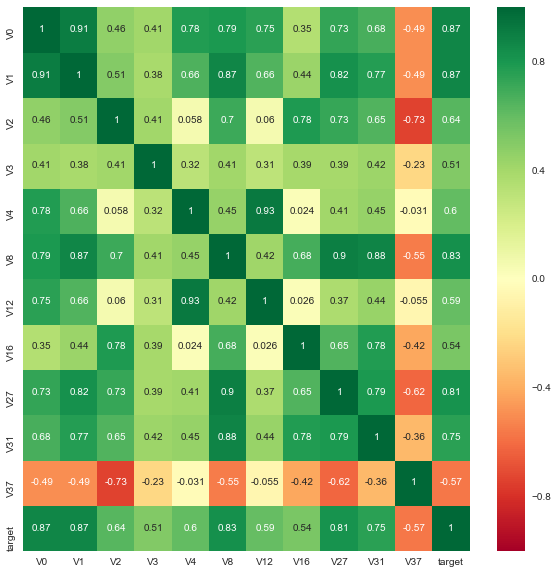

In [43]:
threshold = 0.5

corrmat = train_data.corr()
top_corr_features = corrmat.index[abs(corrmat["target"]) > threshold]
plt.figure(figsize=(10, 10))
g = sns.heatmap(train_data[top_corr_features].corr(),
                annot=True,
                cmap="RdYlGn")

## 移除相关特征

In [37]:
threshold = 0.5

# 相关系矩阵
corr_matrix = data_train1.corr().abs()
drop_col=corr_matrix[corr_matrix["target"]<threshold].index
#data_all.drop(drop_col, axis=1, inplace=True)

## 合并训练和测试数据集

In [38]:
drop_columns = ['V5','V9','V11','V17','V22','V28']
# 合并训练和测试数据集
train_x =  train_data.drop(['target'], axis=1)

#data_all=pd.concat([train_data,test_data],axis=0,ignore_index=True)
data_all = pd.concat([train_x,test_data]) 

data_all.drop(drop_columns,axis=1,inplace=True)

In [39]:
data_all.head()

,V0,V1,V2,...,V35,V36,V37
0,0.566,0.016,-0.143,...,-5.101,-2.608,-3.508
1,0.968,0.437,0.066,...,0.364,-0.335,-0.730
2,1.013,0.568,0.235,...,0.364,0.765,-0.589
3,0.733,0.368,0.283,...,0.364,0.333,-0.112
4,0.684,0.638,0.260,...,0.364,-0.280,-0.028


## 按列合并和归一化

In [40]:
pd.set_option('display.max_columns',6)  


In [41]:
cols_numeric=list(data_all.columns)

def scale_minmax(col):
    return (col-col.min())/(col.max()-col.min())

data_all[cols_numeric] = data_all[cols_numeric].apply(scale_minmax,axis=0)
data_all[cols_numeric].describe()

,V0,V1,V2,...,V35,V36,V37
count,4813.000000,4813.000000,4813.000000,...,4813.000000,4813.000000,4813.000000
mean,0.694172,0.721357,0.602300,...,0.762873,0.332385,0.545795
std,0.144198,0.131443,0.140628,...,0.102037,0.127456,0.150356
min,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000
25%,0.626676,0.679416,0.514414,...,0.727273,0.270584,0.445647
50%,0.729488,0.752497,0.617072,...,0.800020,0.347056,0.539317
75%,0.790195,0.799553,0.700464,...,0.800020,0.414861,0.643061
max,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000


## 分别归一化

In [212]:
train_data_process = train_data[cols_numeric]
train_data_process = train_data_process[cols_numeric].apply(scale_minmax,
                                                            axis=0)

test_data_process = test_data[cols_numeric]
test_data_process = test_data_process[cols_numeric].apply(scale_minmax, 
                                                          axis=0)

## Box-Cox变换分析

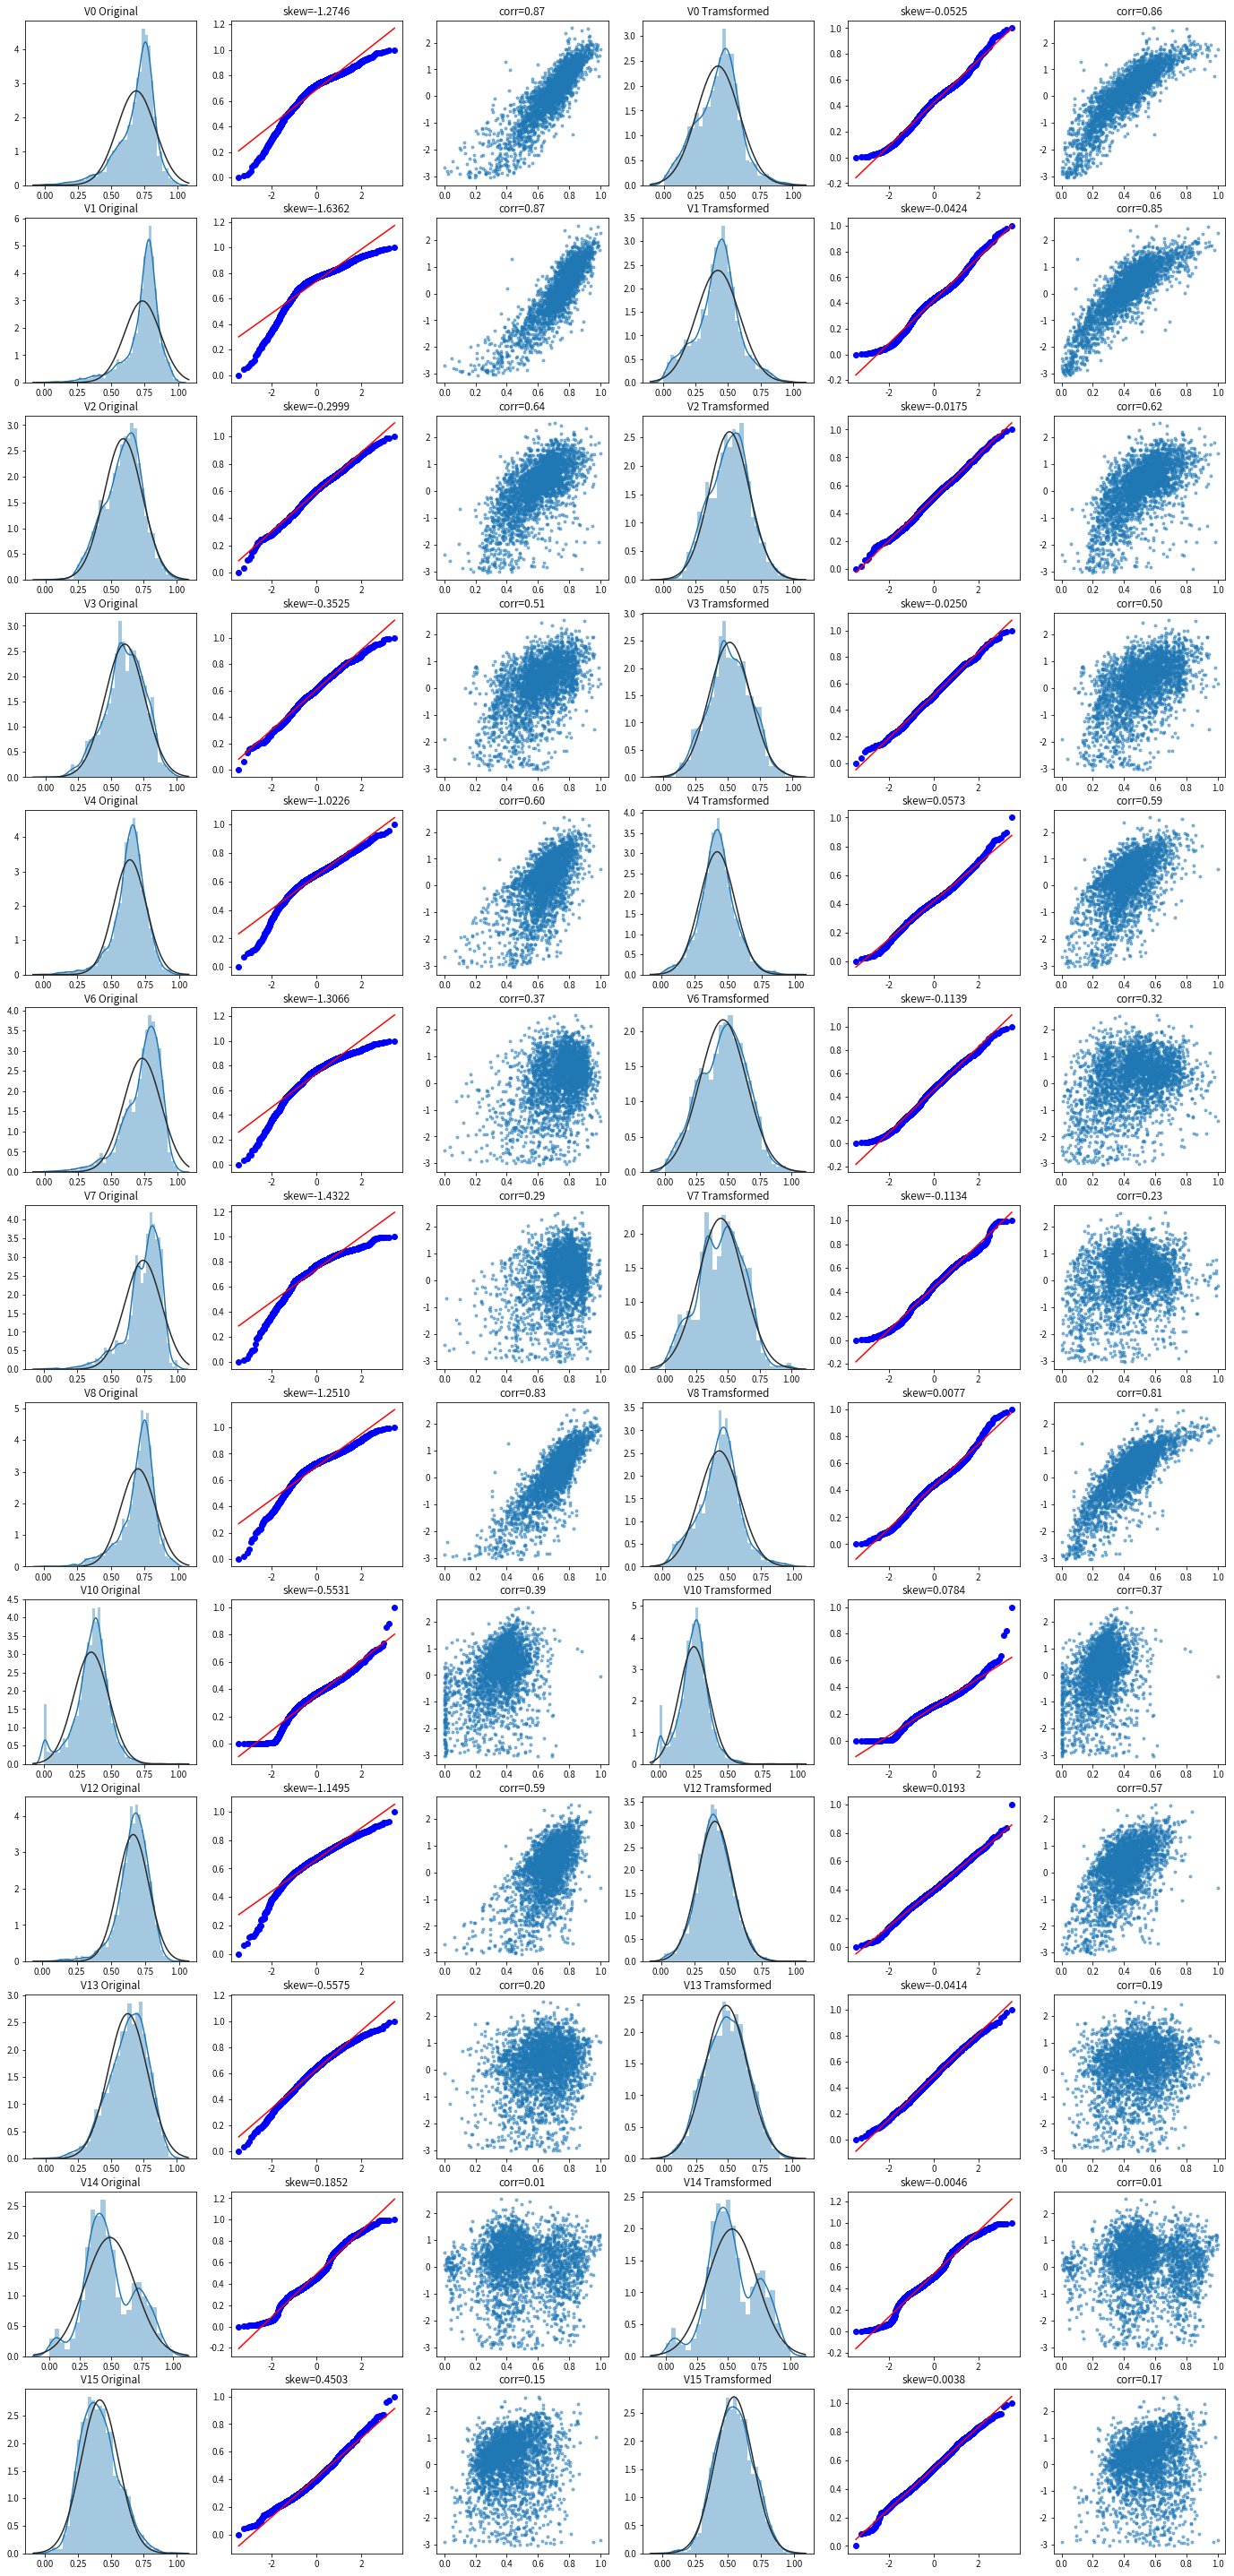

In [213]:
cols_numeric_left = cols_numeric[0:13]
cols_numeric_right = cols_numeric[13:]
train_data_process = pd.concat([train_data_process, train_data['target']],
                               axis=1)

fcols = 6
frows = len(cols_numeric_left)
plt.figure(figsize=(4 * fcols, 4 * frows))
i = 0

for var in cols_numeric_left:
    dat = train_data_process[[var, 'target']].dropna()

    i += 1
    plt.subplot(frows, fcols, i)
    sns.distplot(dat[var], fit=stats.norm)
    plt.title(var + ' Original')
    plt.xlabel('')

    i += 1
    plt.subplot(frows, fcols, i)
    _ = stats.probplot(dat[var], plot=plt)
    plt.title('skew=' + '{:.4f}'.format(stats.skew(dat[var])))
    plt.xlabel('')
    plt.ylabel('')

    i += 1
    plt.subplot(frows, fcols, i)
    plt.plot(dat[var], dat['target'], '.', alpha=0.5)
    plt.title('corr=' +
              '{:.2f}'.format(np.corrcoef(dat[var], dat['target'])[0][1]))

    i += 1
    plt.subplot(frows, fcols, i)
    trans_var, lambda_var = stats.boxcox(dat[var].dropna() + 1)
    trans_var = scale_minmax(trans_var)
    sns.distplot(trans_var, fit=stats.norm)
    plt.title(var + ' Tramsformed')
    plt.xlabel('')

    i += 1
    plt.subplot(frows, fcols, i)
    _ = stats.probplot(trans_var, plot=plt)
    plt.title('skew=' + '{:.4f}'.format(stats.skew(trans_var)))
    plt.xlabel('')
    plt.ylabel('')

    i += 1
    plt.subplot(frows, fcols, i)
    plt.plot(trans_var, dat['target'], '.', alpha=0.5)
    plt.title('corr=' +
              '{:.2f}'.format(np.corrcoef(trans_var, dat['target'])[0][1]))